In [1]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#8F003C','#eb3446','Tourney','Smokum',45,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h4 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h4>"""%string))
    
    
dhtml(' 🔥💥 TPS-08: CB + LGBM + XGB  Starter 💥🔥 ' )

In [2]:
from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #00018D;
	box-shadow: 
		inset 0 0 0 1px rgba(97,0,45, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px #F2D8FF;
	border-radius: 0 10px 0 15px;
	background: #FFD8B2
    
}
</style>
""")

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directo
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2021/train.csv
/kaggle/input/tabular-playground-series-aug-2021/test.csv


<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold"> ✅ Importing Required Libraries:</h1>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
import lightgbm as lgbm
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import optuna
import tqdm
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold"> 🔍 Basic Data Exploration:</h1>

In [5]:
train=pd.read_csv("../input/tabular-playground-series-aug-2021/train.csv")
test=pd.read_csv("../input/tabular-playground-series-aug-2021/test.csv")


In [6]:
train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [7]:
test.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


In [8]:
train.isnull().sum()

id      0
f0      0
f1      0
f2      0
f3      0
       ..
f96     0
f97     0
f98     0
f99     0
loss    0
Length: 102, dtype: int64

In [9]:
test.isnull().sum()

id     0
f0     0
f1     0
f2     0
f3     0
      ..
f95    0
f96    0
f97    0
f98    0
f99    0
Length: 101, dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 102 entries, id to loss
dtypes: float64(95), int64(7)
memory usage: 194.5 MB


In [11]:
train.drop(columns=['id']).describe().T.style.bar(subset=['mean'], color='#606ff2')\
                            .background_gradient(subset=['std'], cmap='PuBu')\
                            .background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
f0,250000.000000,0.511213,0.307884,-0.069273,0.251287,0.514962,0.777323,1.072070
f1,250000.000000,51.378476,42.396636,-17.000000,18.000000,41.000000,75.000000,273.000000
f2,250000.000000,0.107155,1.322200,-7.895580,-0.611172,0.253815,0.759249,9.768590
f3,250000.000000,0.050010,0.792368,-1.475560,-0.719418,0.004099,0.765456,1.680190
f4,250000.000000,3595.133426,6072.401061,-7589.280000,163.864750,943.000500,4115.355000,37847.500000
f5,250000.000000,8.205953,5.475723,-3.291050,4.110127,7.472445,11.030950,35.078000
f6,250000.000000,164.508753,183.335563,-40.967200,27.894900,91.005250,240.843750,947.143000
f7,250000.000000,0.375533,0.813597,-4.143080,-0.026245,0.619862,0.933855,4.010380
f8,250000.000000,16.669745,99.758709,-502.813000,-17.392025,8.714945,55.407625,465.956000
f9,250000.000000,1.190382,0.099700,0.934037,1.132640,1.170370,1.218880,1.712450


In [12]:
test.drop(columns=['id']).describe().T.style.bar(subset=['mean'], color='#606ff2')\
                            .background_gradient(subset=['std'], cmap='PuBu')\
                            .background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
f0,150000.000000,0.513137,0.307512,-0.064172,0.254897,0.516855,0.778300,1.072210
f1,150000.000000,51.612380,42.662212,-17.000000,18.000000,41.000000,76.000000,270.000000
f2,150000.000000,0.108166,1.338636,-7.952920,-0.615063,0.253162,0.759430,9.931070
f3,150000.000000,0.047793,0.790894,-1.491030,-0.718730,0.003786,0.761793,1.670420
f4,150000.000000,3567.849290,6045.626929,-7801.580000,161.797000,935.088500,4076.672500,38434.400000
f5,150000.000000,8.189529,5.443633,-3.097580,4.129198,7.467945,11.016600,34.533000
f6,150000.000000,163.303236,181.799298,-39.020100,27.774750,90.090350,239.953000,943.297000
f7,150000.000000,0.379849,0.812515,-4.062280,-0.024041,0.622288,0.936772,4.183330
f8,150000.000000,16.626872,99.813298,-496.326000,-17.780300,8.433805,55.053075,466.535000
f9,150000.000000,1.190402,0.099975,0.929603,1.132580,1.170310,1.219200,1.711020


In [13]:
def highlight_mean_greater(s):
    '''
    highlight blue is value is greater than mean else pink.
    '''
    is_max = s > s.mean()
    return ['background-color: #606ff2' if i else 'background-color: pink' for i in is_max]

In [14]:
train.drop(columns=['id']).head(20).style.apply(highlight_mean_greater)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,-0.002350,59,0.766739,-1.350460,42.272700,16.685700,30.359900,1.267300,0.392007,1.091010,1.968740,1.874640,117.286000,6.716200,0.985656,0.973428,4004232,0.377896,1.033820,0.574531,0.122371,8.186170,1517.830000,3.132190,0.112836,5.018680,116.766000,10891,8.193660,5.797150,1.099990,14.868400,-0.275434,0.915721,167.800000,-7.534140,4.236320,1.629560,1.144400,-0.303139,4.092090,3.226170,0.074799,0.259497,289.492000,327.465000,5.389310,7.394790,-0.489950,20.292300,2.456600,1.447720,-10639.000000,85.600500,-0.178513,2815,-234.772000,1.833170,88.560500,0.367916,8575340000.000000,70.973300,0.380057,0.031812,1.095270,0.563482,0.122689,1.160720,1.693910,1.072170,65.154300,0.022504,-5.606800,1.798660,0.528068,6696.300000,-0.562078,1.301020,6.716240,1.143470,2.299830,0.010485,-0.127223,0.231086,4.516140,0.594494,397,0.264022,8.687900,15.070100,0.376622,-42.439900,26.854000,1.457510,0.696161,0.941764,1.828470,0.924090,2.296580,10.489800,15
1,0.784462,145,-0.463845,-0.530421,27324.900000,3.475450,160.498000,0.828007,3.735860,1.281380,-2.739470,-0.529506,157.670000,0.696384,1.441230,0.159056,23567462,-0.089583,-0.711628,-1.045860,0.139920,3.692940,-123.354000,7.740970,-0.852302,8.510250,161.175000,87801,12.020200,1.783930,1.231000,10.149700,-0.018724,1.011280,127.401000,11.821400,5.996810,-0.953850,1.379370,1.079530,0.711923,2.906020,0.051206,0.755122,140.893000,29.525200,14.229600,3.532130,-0.405681,42.535700,1.435330,0.939771,138312.000000,59.881000,-0.070959,1435,1046.880000,1.567700,29.430600,2.455150,4518200000.000000,75.560200,1.987990,0.318177,1.149010,0.723574,0.184821,-0.348303,-7.176330,1.462580,43.112100,-0.060801,64.045500,2.358450,5.759690,3958.140000,1.576610,-1.241790,5.914120,0.959826,2.566310,0.000652,-0.335617,-0.271723,5.103190,8.706220,98,0.210513,7.864160,3.371900,0.147973,-184.132000,7.901370,1.706440,-0.494699,-2.058300,0.819184,0.439152,2.364700,1.143830,3
2,0.317816,19,-0.432571,-0.382644,1383.260000,19.712900,31.102600,-0.515354,34.430800,1.242100,2.901800,-0.960340,118.590000,7.696420,1.488760,0.387277,235760,0.055568,0.268560,0.718133,0.027133,11.673400,270.247000,3.440510,-0.679071,13.378100,150.362000,14173,1.699540,7.047280,1.105130,7.628710,0.685721,0.809485,120.064000,194.427000,6.778660,0.634136,0.934386,0.926980,0.741116,2.422050,0.260362,0.626639,369.579000,370.024000,4.488930,7.842900,1.196010,43.534300,2.591820,1.256710,168881.000000,83.841900,2.713230,2911,23256.900000,3.918960,97.557800,4.385380,844497000.000000,99.493300,5.098040,0.258909,1.168780,0.049053,0.173547,0.937000,2.059470,1.222450,50.226700,-0.026215,71.684900,2.434170,1.904560,27165.800000,-0.773223,-1.833390,4.985480,1.170870,1.172010,0.016848,-0.235581,-0.724935,3.225650,4.170990,105,-0.155451,8.918290,0.186334,0.335985,7.437210,37.218100,3.253390,0.337934,0.615037,2.216760,0.745268,1.696790,12.305500,6
3,0.210753,17,-0.616454,0.946362,-119.253000,4.082350,185.257000,1.383310,-47.521400,1.091300,-1.512000,-1.292340,125.461000,7.343230,-3.092390,0.713795,1146032,0.326534,0.454842,0.219958,0.037982,5.151950,4893.860000,6.897510,-0.830552,4.431840,132.855000,77147,32.809000,4.063900,1.119110,3.917760,0.500353,0.206448,120.411000,233.537000,7.751310,0.625762,-1.940810,1.333210,-5.793170,1.565120,0.309483,0.134558,84.863700,24.335300,4.871200,2.551040,-0.372300,14.896000,1.100130,0.892193,17006.600000,78.407800,0.425686,1723,375.240000,1.945390,98.150000,-0.109164,3543970000.000000,60.808200,2.357590,0.239080,1.161160,0.535797,0.222185,1.163120,2.363430,1.415300,116.182000,0.018674,55.442800,2.228240,4.303600,2643.760000,-1.666320,0.792398,6.451620,1.0

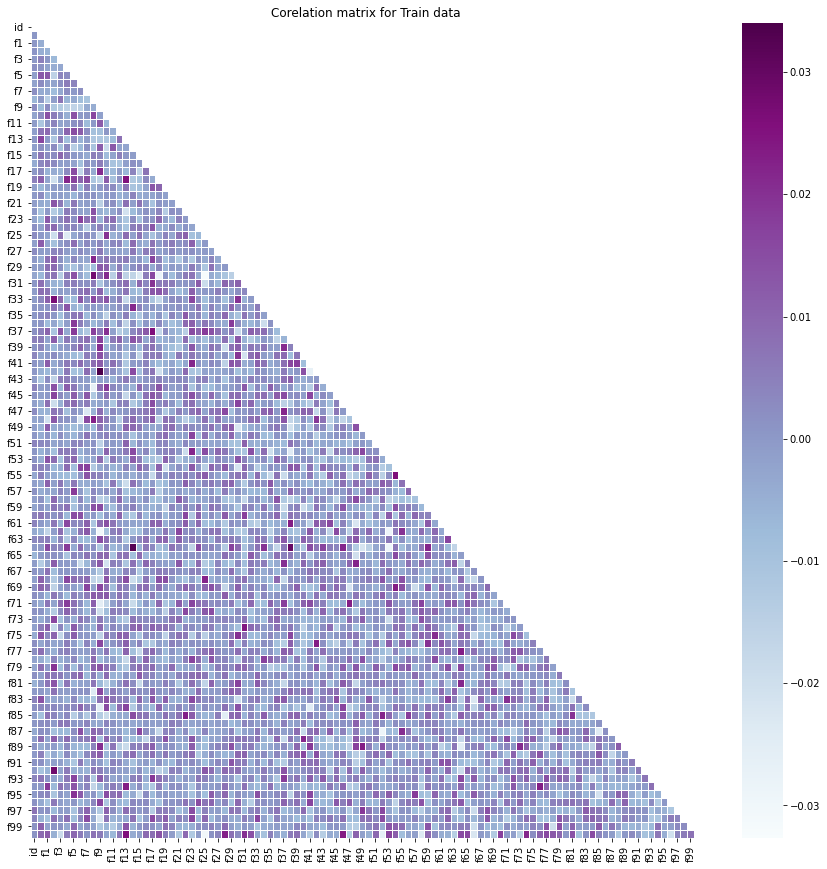

In [15]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (15, 15))
plt.title('Corelation matrix for Train data')
sns.heatmap(corr, mask = mask, cmap = 'BuPu', linewidths = .5)
plt.show()

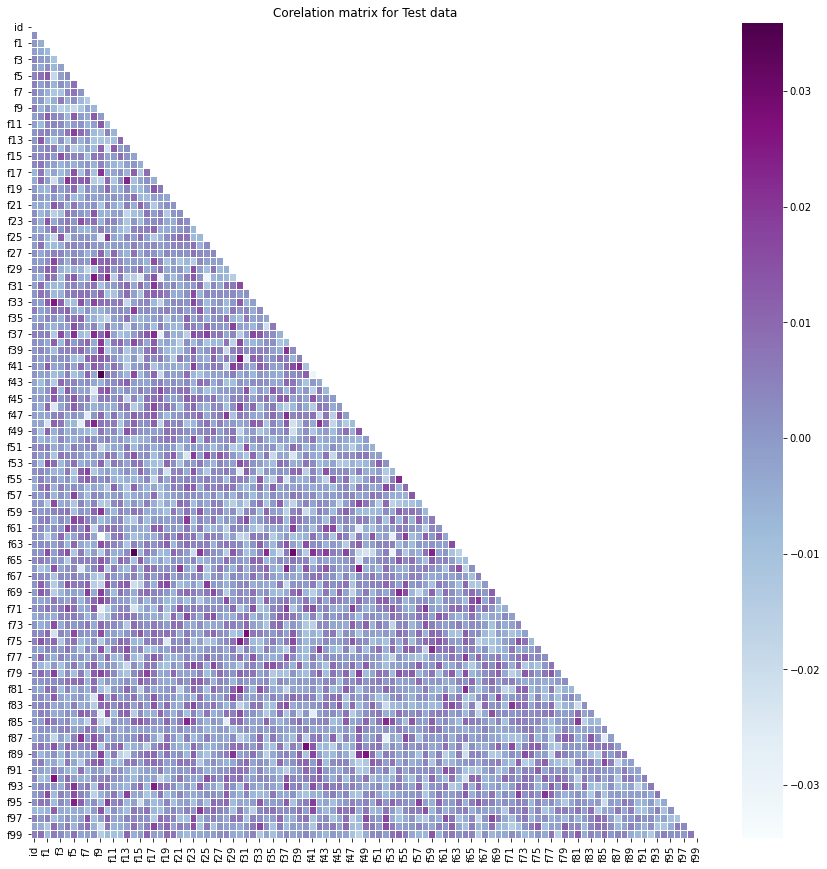

In [16]:
corr = test.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (15, 15))
plt.title('Corelation matrix for Test data')
sns.heatmap(corr, mask = mask, cmap = 'BuPu', linewidths = .5)
plt.show()

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold"> ⚒ Data Transformation:</h1>

In [17]:
y = train['loss']
train.drop(['id','loss'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)

In [18]:
not_features = ['id', 'loss']
features = []
for feat in train.columns:
    if feat not in not_features:
        features.append(feat)
print(features)

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99']


In [19]:
scaler = StandardScaler()
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [20]:
x=train

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold"> 🌀 Optuna Objective for Catboost:</h1>

In [21]:
def objective(trial,data=x,target=y):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25,random_state=42)
    params = {'iterations':trial.suggest_int("iterations", 1000, 20000),
              'od_wait':trial.suggest_int('od_wait', 500, 2000),
             'loss_function':'RMSE',
              'task_type':"GPU",
              'eval_metric':'RMSE',
              'leaf_estimation_method':'Newton',
              'bootstrap_type': 'Bernoulli',
              'learning_rate' : trial.suggest_uniform('learning_rate',0.02,1),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'random_strength': trial.suggest_uniform('random_strength',10,50),
              'depth': trial.suggest_int('depth',1,15),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
               }
    model = CatBoostRegressor(**params)  
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
        
    y_preds = model.predict(X_test)
    loss = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return loss

In [22]:
OPTUNA_OPTIMIZATION = True

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2021-08-01 14:19:25,389] A new study created in memory with name: no-name-a3750125-43f0-4f86-bd79-d41da66b58a7
[I 2021-08-01 14:20:31,828] Trial 0 finished with value: 7.861759507273968 and parameters: {'iterations': 7161, 'od_wait': 1368, 'learning_rate': 0.3770221918805632, 'reg_lambda': 10.20343481048078, 'subsample': 0.4067349058254891, 'random_strength': 25.666626069910418, 'depth': 5, 'min_data_in_leaf': 17, 'leaf_estimation_iterations': 12}. Best is trial 0 with value: 7.861759507273968.
[I 2021-08-01 14:20:35,355] Trial 1 finished with value: 7.879767007994432 and parameters: {'iterations': 12977, 'od_wait': 1728, 'learning_rate': 0.5242592025812826, 'reg_lambda': 22.52451380223959, 'subsample': 0.25617801387898875, 'random_strength': 30.446382031094203, 'depth': 7, 'min_data_in_leaf': 14, 'leaf_estimation_iterations': 1}. Best is trial 0 with value: 7.861759507273968.
[I 2021-08-01 14:20:40,603] Trial 2 finished with value: 7.91401601529091 and parameters: {'iterations': 10

Number of finished trials: 50
Best trial: score 7.8308771754445505, params {'iterations': 7078, 'od_wait': 1347, 'learning_rate': 0.02083418178190688, 'reg_lambda': 63.9310184873212, 'subsample': 0.8343375756990639, 'random_strength': 17.173801776811832, 'depth': 6, 'min_data_in_leaf': 10, 'leaf_estimation_iterations': 3}


In [23]:
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(study))
    display(optuna.visualization.plot_slice(study))
    display(optuna.visualization.plot_parallel_coordinate(study))

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">👨‍💻 Catboost Model Training:</h1>

In [24]:
cat_params = study.best_trial.params
cat_params['loss_function'] = 'RMSE'
cat_params['eval_metric'] = 'RMSE'
cat_params['bootstrap_type']= 'Bernoulli'
cat_params['leaf_estimation_method'] = 'Newton'
cat_params['random_state'] = 42
cat_params['task_type']='GPU'
test_preds=None

print("\033[93mTraining........")

kf = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = 42)
for fold, (tr_index , val_index) in enumerate(kf.split(x.values , y.values)):
    
    print("⁙" * 10)
    print(f"Fold {fold + 1}")
    
    x_train,x_val = x.values[tr_index] , x.values[val_index]
    y_train,y_val = y.values[tr_index] , y.values[val_index]
        
    eval_set = [(x_val, y_val)]
    
    model =CatBoostRegressor(**cat_params)
    model.fit(x_train, y_train, eval_set = eval_set, verbose = False)
    
    train_preds = model.predict(x_train)    
    val_preds = model.predict(x_val)
    
    print(np.sqrt(mean_squared_error(y_val, val_preds)))
    
    if test_preds is None:
        test_preds = model.predict(test.values)
    else:
        test_preds += model.predict(test.values)

print("-" * 50)
print("\033[95mTraining Done")

test_preds /= 10

Training........
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
7.832898079789738
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
7.834162714831406
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
7.841040086686393
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
7.8307853763262205
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 5
7.838571855694111
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 6
7.835190656808193
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 7
7.845441153318569
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 8
7.8398541143434235
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 9
7.834279944532516
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 10
7.824574567515762
--------------------------------------------------
Training Done


<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Submission File for Catboost:</h1>

In [25]:
submission = pd.read_csv("../input/tabular-playground-series-aug-2021/sample_submission.csv")


In [26]:
submission['loss']=test_preds

In [27]:
submission.to_csv("subcat.csv",index=False)

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">🌀 Optuna Objective for LGBM:</h1>

In [28]:
def objective2(trial,data=x,target=y):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25,random_state=42)
    params = {
        "metric": "RMSE",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    model = lgbm.LGBMRegressor(**params,device = 'gpu',random_state=42)
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose = False)
        
    y_preds = model.predict(X_test)
    loss = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return loss

In [29]:
OPTUNA_OPTIMIZATION = True

study = optuna.create_study(direction='minimize')
study.optimize(objective2, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2021-08-01 14:47:18,605] A new study created in memory with name: no-name-3b6b382e-61b7-4bcc-90a4-152b7956e15e


[LightGBM] [Warning] lambda_l1 is set=1.135485945551419e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.135485945551419e-05
[LightGBM] [Warning] feature_fraction is set=0.4651646314559774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4651646314559774
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.532097463266048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.532097463266048
[LightGBM] [Warning] lambda_l2 is set=1.2676400728007644e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2676400728007644e-06


[I 2021-08-01 14:47:30,890] Trial 0 finished with value: 7.857925911272476 and parameters: {'lambda_l1': 1.135485945551419e-05, 'lambda_l2': 1.2676400728007644e-06, 'num_leaves': 38, 'feature_fraction': 0.4651646314559774, 'bagging_fraction': 0.532097463266048, 'bagging_freq': 3, 'min_child_samples': 98}. Best is trial 0 with value: 7.857925911272476.


[LightGBM] [Warning] lambda_l1 is set=9.503331136415391e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.503331136415391e-05
[LightGBM] [Warning] feature_fraction is set=0.40230691509700667, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40230691509700667
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.6804572898984533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6804572898984533
[LightGBM] [Warning] lambda_l2 is set=1.3365695392062788e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3365695392062788e-06


[I 2021-08-01 14:47:41,510] Trial 1 finished with value: 7.8896586465750564 and parameters: {'lambda_l1': 9.503331136415391e-05, 'lambda_l2': 1.3365695392062788e-06, 'num_leaves': 167, 'feature_fraction': 0.40230691509700667, 'bagging_fraction': 0.6804572898984533, 'bagging_freq': 6, 'min_child_samples': 53}. Best is trial 0 with value: 7.857925911272476.


[LightGBM] [Warning] lambda_l1 is set=3.140049646203482e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.140049646203482e-06
[LightGBM] [Warning] feature_fraction is set=0.8509315377414381, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8509315377414381
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.8727645012351943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8727645012351943
[LightGBM] [Warning] lambda_l2 is set=0.34073429459973437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.34073429459973437


[I 2021-08-01 14:47:52,187] Trial 2 finished with value: 7.867147647715833 and parameters: {'lambda_l1': 3.140049646203482e-06, 'lambda_l2': 0.34073429459973437, 'num_leaves': 92, 'feature_fraction': 0.8509315377414381, 'bagging_fraction': 0.8727645012351943, 'bagging_freq': 6, 'min_child_samples': 51}. Best is trial 0 with value: 7.857925911272476.


[LightGBM] [Warning] lambda_l1 is set=0.5767610085271198, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5767610085271198
[LightGBM] [Warning] feature_fraction is set=0.7775100184846582, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7775100184846582
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8788698083230668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8788698083230668
[LightGBM] [Warning] lambda_l2 is set=0.003335456573177112, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003335456573177112


[I 2021-08-01 14:48:08,976] Trial 3 finished with value: 7.871199512872136 and parameters: {'lambda_l1': 0.5767610085271198, 'lambda_l2': 0.003335456573177112, 'num_leaves': 208, 'feature_fraction': 0.7775100184846582, 'bagging_fraction': 0.8788698083230668, 'bagging_freq': 4, 'min_child_samples': 86}. Best is trial 0 with value: 7.857925911272476.


[LightGBM] [Warning] lambda_l1 is set=7.408381154679556e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.408381154679556e-06
[LightGBM] [Warning] feature_fraction is set=0.8546480293582862, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8546480293582862
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.5680532588999438, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5680532588999438
[LightGBM] [Warning] lambda_l2 is set=8.672999927576762e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.672999927576762e-05


[I 2021-08-01 14:48:24,245] Trial 4 finished with value: 7.908154386539197 and parameters: {'lambda_l1': 7.408381154679556e-06, 'lambda_l2': 8.672999927576762e-05, 'num_leaves': 203, 'feature_fraction': 0.8546480293582862, 'bagging_fraction': 0.5680532588999438, 'bagging_freq': 2, 'min_child_samples': 85}. Best is trial 0 with value: 7.857925911272476.


[LightGBM] [Warning] lambda_l1 is set=0.003492360261904247, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003492360261904247
[LightGBM] [Warning] feature_fraction is set=0.9780669401309668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9780669401309668
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.47497998789389995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.47497998789389995
[LightGBM] [Warning] lambda_l2 is set=6.4881341772334384e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.4881341772334384e-06


[I 2021-08-01 14:48:37,312] Trial 5 finished with value: 7.898008407467739 and parameters: {'lambda_l1': 0.003492360261904247, 'lambda_l2': 6.4881341772334384e-06, 'num_leaves': 125, 'feature_fraction': 0.9780669401309668, 'bagging_fraction': 0.47497998789389995, 'bagging_freq': 7, 'min_child_samples': 98}. Best is trial 0 with value: 7.857925911272476.


[LightGBM] [Warning] lambda_l1 is set=1.6519509145199565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6519509145199565
[LightGBM] [Warning] feature_fraction is set=0.8145259503963342, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8145259503963342
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.8022531597656184, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8022531597656184
[LightGBM] [Warning] lambda_l2 is set=0.06663675164973007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06663675164973007


[I 2021-08-01 14:48:48,892] Trial 6 finished with value: 7.875821474969372 and parameters: {'lambda_l1': 1.6519509145199565, 'lambda_l2': 0.06663675164973007, 'num_leaves': 121, 'feature_fraction': 0.8145259503963342, 'bagging_fraction': 0.8022531597656184, 'bagging_freq': 6, 'min_child_samples': 58}. Best is trial 0 with value: 7.857925911272476.


[LightGBM] [Warning] lambda_l1 is set=8.759755725158564, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.759755725158564
[LightGBM] [Warning] feature_fraction is set=0.8175089398825817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8175089398825817
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5182210220420993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5182210220420993
[LightGBM] [Warning] lambda_l2 is set=0.001044450759450722, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001044450759450722


[I 2021-08-01 14:48:58,685] Trial 7 finished with value: 7.876011527478604 and parameters: {'lambda_l1': 8.759755725158564, 'lambda_l2': 0.001044450759450722, 'num_leaves': 75, 'feature_fraction': 0.8175089398825817, 'bagging_fraction': 0.5182210220420993, 'bagging_freq': 5, 'min_child_samples': 46}. Best is trial 0 with value: 7.857925911272476.


[LightGBM] [Warning] lambda_l1 is set=3.44073205192297e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.44073205192297e-05
[LightGBM] [Warning] feature_fraction is set=0.7559337471834119, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7559337471834119
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8376301588295061, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8376301588295061
[LightGBM] [Warning] lambda_l2 is set=0.007946316719849706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007946316719849706


[I 2021-08-01 14:49:09,674] Trial 8 finished with value: 7.861198972557516 and parameters: {'lambda_l1': 3.44073205192297e-05, 'lambda_l2': 0.007946316719849706, 'num_leaves': 87, 'feature_fraction': 0.7559337471834119, 'bagging_fraction': 0.8376301588295061, 'bagging_freq': 3, 'min_child_samples': 94}. Best is trial 0 with value: 7.857925911272476.


[LightGBM] [Warning] lambda_l1 is set=0.062223695687603796, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.062223695687603796
[LightGBM] [Warning] feature_fraction is set=0.8193727623835341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8193727623835341
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.755207090143035, subsample=1.0 will be ignored. Current value: bagging_fraction=0.755207090143035
[LightGBM] [Warning] lambda_l2 is set=2.523579619436138e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.523579619436138e-07


[I 2021-08-01 14:49:19,414] Trial 9 finished with value: 7.867757833344882 and parameters: {'lambda_l1': 0.062223695687603796, 'lambda_l2': 2.523579619436138e-07, 'num_leaves': 85, 'feature_fraction': 0.8193727623835341, 'bagging_fraction': 0.755207090143035, 'bagging_freq': 2, 'min_child_samples': 35}. Best is trial 0 with value: 7.857925911272476.


[LightGBM] [Warning] lambda_l1 is set=1.1423899349721515e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1423899349721515e-08
[LightGBM] [Warning] feature_fraction is set=0.47145156956768275, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47145156956768275
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.6200415506898282, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6200415506898282
[LightGBM] [Warning] lambda_l2 is set=1.1647651242464795e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1647651242464795e-08


[I 2021-08-01 14:49:25,784] Trial 10 finished with value: 7.8575575436074825 and parameters: {'lambda_l1': 1.1423899349721515e-08, 'lambda_l2': 1.1647651242464795e-08, 'num_leaves': 19, 'feature_fraction': 0.47145156956768275, 'bagging_fraction': 0.6200415506898282, 'bagging_freq': 1, 'min_child_samples': 8}. Best is trial 10 with value: 7.8575575436074825.


[LightGBM] [Warning] lambda_l1 is set=1.2085841922240302e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2085841922240302e-08
[LightGBM] [Warning] feature_fraction is set=0.4694408472912117, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4694408472912117
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.6271901308826906, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6271901308826906
[LightGBM] [Warning] lambda_l2 is set=1.8475694902622467e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8475694902622467e-08


[I 2021-08-01 14:49:30,526] Trial 11 finished with value: 7.887911170920389 and parameters: {'lambda_l1': 1.2085841922240302e-08, 'lambda_l2': 1.8475694902622467e-08, 'num_leaves': 3, 'feature_fraction': 0.4694408472912117, 'bagging_fraction': 0.6271901308826906, 'bagging_freq': 1, 'min_child_samples': 5}. Best is trial 10 with value: 7.8575575436074825.


[LightGBM] [Warning] lambda_l1 is set=5.3044903589092775e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.3044903589092775e-08
[LightGBM] [Warning] feature_fraction is set=0.5581980320570252, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5581980320570252
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.4303659527237155, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4303659527237155
[LightGBM] [Warning] lambda_l2 is set=1.6420413883253472e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6420413883253472e-08


[I 2021-08-01 14:49:36,592] Trial 12 finished with value: 7.877103684744621 and parameters: {'lambda_l1': 5.3044903589092775e-08, 'lambda_l2': 1.6420413883253472e-08, 'num_leaves': 4, 'feature_fraction': 0.5581980320570252, 'bagging_fraction': 0.4303659527237155, 'bagging_freq': 1, 'min_child_samples': 9}. Best is trial 10 with value: 7.8575575436074825.


[LightGBM] [Warning] lambda_l1 is set=9.153162485572926e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.153162485572926e-08
[LightGBM] [Warning] feature_fraction is set=0.5671933882510812, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5671933882510812
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9844660289133833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9844660289133833
[LightGBM] [Warning] lambda_l2 is set=1.1273685599885424e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1273685599885424e-08


[I 2021-08-01 14:49:43,451] Trial 13 finished with value: 7.855238777080854 and parameters: {'lambda_l1': 9.153162485572926e-08, 'lambda_l2': 1.1273685599885424e-08, 'num_leaves': 44, 'feature_fraction': 0.5671933882510812, 'bagging_fraction': 0.9844660289133833, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 13 with value: 7.855238777080854.


[LightGBM] [Warning] lambda_l1 is set=2.6404575609144477e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6404575609144477e-07
[LightGBM] [Warning] feature_fraction is set=0.6136403635636544, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6136403635636544
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6933186680480963, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6933186680480963
[LightGBM] [Warning] lambda_l2 is set=7.628891995276291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.628891995276291


[I 2021-08-01 14:49:50,667] Trial 14 finished with value: 7.85642810353859 and parameters: {'lambda_l1': 2.6404575609144477e-07, 'lambda_l2': 7.628891995276291, 'num_leaves': 37, 'feature_fraction': 0.6136403635636544, 'bagging_fraction': 0.6933186680480963, 'bagging_freq': 2, 'min_child_samples': 21}. Best is trial 13 with value: 7.855238777080854.


[LightGBM] [Warning] lambda_l1 is set=2.3350779376030505e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3350779376030505e-07
[LightGBM] [Warning] feature_fraction is set=0.6705414373710105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6705414373710105
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9392128267669394, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9392128267669394
[LightGBM] [Warning] lambda_l2 is set=5.323382589519377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.323382589519377


[I 2021-08-01 14:49:58,890] Trial 15 finished with value: 7.856758380514409 and parameters: {'lambda_l1': 2.3350779376030505e-07, 'lambda_l2': 5.323382589519377, 'num_leaves': 46, 'feature_fraction': 0.6705414373710105, 'bagging_fraction': 0.9392128267669394, 'bagging_freq': 3, 'min_child_samples': 25}. Best is trial 13 with value: 7.855238777080854.


[LightGBM] [Warning] lambda_l1 is set=5.754576851152073e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.754576851152073e-07
[LightGBM] [Warning] feature_fraction is set=0.6219509304139089, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6219509304139089
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9730297089372516, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9730297089372516
[LightGBM] [Warning] lambda_l2 is set=6.691755661390192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.691755661390192


[I 2021-08-01 14:50:07,353] Trial 16 finished with value: 7.856149804729258 and parameters: {'lambda_l1': 5.754576851152073e-07, 'lambda_l2': 6.691755661390192, 'num_leaves': 53, 'feature_fraction': 0.6219509304139089, 'bagging_fraction': 0.9730297089372516, 'bagging_freq': 4, 'min_child_samples': 26}. Best is trial 13 with value: 7.855238777080854.


[LightGBM] [Warning] lambda_l1 is set=0.0008997182680826431, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008997182680826431
[LightGBM] [Warning] feature_fraction is set=0.5676166366912722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5676166366912722
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9910417661441246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9910417661441246
[LightGBM] [Warning] lambda_l2 is set=2.6094947504724692e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6094947504724692e-05


[I 2021-08-01 14:50:15,679] Trial 17 finished with value: 7.858135182980272 and parameters: {'lambda_l1': 0.0008997182680826431, 'lambda_l2': 2.6094947504724692e-05, 'num_leaves': 60, 'feature_fraction': 0.5676166366912722, 'bagging_fraction': 0.9910417661441246, 'bagging_freq': 4, 'min_child_samples': 26}. Best is trial 13 with value: 7.855238777080854.


[LightGBM] [Warning] lambda_l1 is set=3.519632700925157e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.519632700925157e-07
[LightGBM] [Warning] feature_fraction is set=0.6721002408148178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6721002408148178
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9874763982752326, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9874763982752326
[LightGBM] [Warning] lambda_l2 is set=0.6743437612877702, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6743437612877702


[I 2021-08-01 14:50:27,899] Trial 18 finished with value: 7.87239919261141 and parameters: {'lambda_l1': 3.519632700925157e-07, 'lambda_l2': 0.6743437612877702, 'num_leaves': 162, 'feature_fraction': 0.6721002408148178, 'bagging_fraction': 0.9874763982752326, 'bagging_freq': 5, 'min_child_samples': 66}. Best is trial 13 with value: 7.855238777080854.


[LightGBM] [Warning] lambda_l1 is set=1.7471686326004177e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7471686326004177e-06
[LightGBM] [Warning] feature_fraction is set=0.5930117319985365, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5930117319985365
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9350654915004325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9350654915004325
[LightGBM] [Warning] lambda_l2 is set=0.03699576708234304, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03699576708234304


[I 2021-08-01 14:50:43,296] Trial 19 finished with value: 7.892728680399742 and parameters: {'lambda_l1': 1.7471686326004177e-06, 'lambda_l2': 0.03699576708234304, 'num_leaves': 249, 'feature_fraction': 0.5930117319985365, 'bagging_fraction': 0.9350654915004325, 'bagging_freq': 5, 'min_child_samples': 38}. Best is trial 13 with value: 7.855238777080854.


[LightGBM] [Warning] lambda_l1 is set=3.4295050431736213e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4295050431736213e-08
[LightGBM] [Warning] feature_fraction is set=0.5321191820025789, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5321191820025789
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9387989121199487, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9387989121199487
[LightGBM] [Warning] lambda_l2 is set=0.00018667390067582217, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018667390067582217


[I 2021-08-01 14:50:49,248] Trial 20 finished with value: 7.854147334882589 and parameters: {'lambda_l1': 3.4295050431736213e-08, 'lambda_l2': 0.00018667390067582217, 'num_leaves': 23, 'feature_fraction': 0.5321191820025789, 'bagging_fraction': 0.9387989121199487, 'bagging_freq': 4, 'min_child_samples': 21}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=3.645730802878085e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.645730802878085e-08
[LightGBM] [Warning] feature_fraction is set=0.5295882569743261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5295882569743261
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9368803374451411, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9368803374451411
[LightGBM] [Warning] lambda_l2 is set=0.0005026115018681843, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005026115018681843


[I 2021-08-01 14:50:55,512] Trial 21 finished with value: 7.855168058034825 and parameters: {'lambda_l1': 3.645730802878085e-08, 'lambda_l2': 0.0005026115018681843, 'num_leaves': 23, 'feature_fraction': 0.5295882569743261, 'bagging_fraction': 0.9368803374451411, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=3.6107773654255804e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6107773654255804e-08
[LightGBM] [Warning] feature_fraction is set=0.5118797214400126, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5118797214400126
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9183002130944612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9183002130944612
[LightGBM] [Warning] lambda_l2 is set=0.0003362667632246971, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003362667632246971


[I 2021-08-01 14:51:01,209] Trial 22 finished with value: 7.858382987175675 and parameters: {'lambda_l1': 3.6107773654255804e-08, 'lambda_l2': 0.0003362667632246971, 'num_leaves': 15, 'feature_fraction': 0.5118797214400126, 'bagging_fraction': 0.9183002130944612, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=3.808942564563635e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.808942564563635e-08
[LightGBM] [Warning] feature_fraction is set=0.40955270878018957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40955270878018957
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.779078722459695, subsample=1.0 will be ignored. Current value: bagging_fraction=0.779078722459695
[LightGBM] [Warning] lambda_l2 is set=8.265063456487924e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.265063456487924e-05


[I 2021-08-01 14:51:07,811] Trial 23 finished with value: 7.856010144741432 and parameters: {'lambda_l1': 3.808942564563635e-08, 'lambda_l2': 8.265063456487924e-05, 'num_leaves': 23, 'feature_fraction': 0.40955270878018957, 'bagging_fraction': 0.779078722459695, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=6.123551053533732e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.123551053533732e-08
[LightGBM] [Warning] feature_fraction is set=0.5281349788769361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5281349788769361
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9053862344896063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9053862344896063
[LightGBM] [Warning] lambda_l2 is set=1.0064090175468016e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0064090175468016e-07


[I 2021-08-01 14:51:17,012] Trial 24 finished with value: 7.85629581874658 and parameters: {'lambda_l1': 6.123551053533732e-08, 'lambda_l2': 1.0064090175468016e-07, 'num_leaves': 66, 'feature_fraction': 0.5281349788769361, 'bagging_fraction': 0.9053862344896063, 'bagging_freq': 5, 'min_child_samples': 33}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=1.7960253003139873e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7960253003139873e-08
[LightGBM] [Warning] feature_fraction is set=0.5132632272568768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5132632272568768
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8366695329542924, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8366695329542924
[LightGBM] [Warning] lambda_l2 is set=0.0026032212444748485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0026032212444748485


[I 2021-08-01 14:51:26,726] Trial 25 finished with value: 7.877289426754879 and parameters: {'lambda_l1': 1.7960253003139873e-08, 'lambda_l2': 0.0026032212444748485, 'num_leaves': 106, 'feature_fraction': 0.5132632272568768, 'bagging_fraction': 0.8366695329542924, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=1.0264178562564998e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0264178562564998e-06
[LightGBM] [Warning] feature_fraction is set=0.4237329984902568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4237329984902568
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9760444384134508, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9760444384134508
[LightGBM] [Warning] lambda_l2 is set=0.0003244559636055433, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003244559636055433


[I 2021-08-01 14:51:31,327] Trial 26 finished with value: 7.882922332380994 and parameters: {'lambda_l1': 1.0264178562564998e-06, 'lambda_l2': 0.0003244559636055433, 'num_leaves': 4, 'feature_fraction': 0.4237329984902568, 'bagging_fraction': 0.9760444384134508, 'bagging_freq': 4, 'min_child_samples': 43}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=1.437584272466932e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.437584272466932e-07
[LightGBM] [Warning] feature_fraction is set=0.6446125255544963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6446125255544963
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9526201909381311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9526201909381311
[LightGBM] [Warning] lambda_l2 is set=4.400642122358707e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.400642122358707e-06


[I 2021-08-01 14:51:38,101] Trial 27 finished with value: 7.854663076485029 and parameters: {'lambda_l1': 1.437584272466932e-07, 'lambda_l2': 4.400642122358707e-06, 'num_leaves': 29, 'feature_fraction': 0.6446125255544963, 'bagging_fraction': 0.9526201909381311, 'bagging_freq': 2, 'min_child_samples': 31}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=1.161324599839367e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.161324599839367e-08
[LightGBM] [Warning] feature_fraction is set=0.7054071905846256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7054071905846256
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.746666450443201, subsample=1.0 will be ignored. Current value: bagging_fraction=0.746666450443201
[LightGBM] [Warning] lambda_l2 is set=1.3273183853606537e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3273183853606537e-05


[I 2021-08-01 14:51:45,355] Trial 28 finished with value: 7.858959262403302 and parameters: {'lambda_l1': 1.161324599839367e-08, 'lambda_l2': 1.3273183853606537e-05, 'num_leaves': 27, 'feature_fraction': 0.7054071905846256, 'bagging_fraction': 0.746666450443201, 'bagging_freq': 2, 'min_child_samples': 31}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=1.4353720703377573e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4353720703377573e-05
[LightGBM] [Warning] feature_fraction is set=0.6701321807468726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6701321807468726
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.852026414035169, subsample=1.0 will be ignored. Current value: bagging_fraction=0.852026414035169
[LightGBM] [Warning] lambda_l2 is set=2.849259134628223e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.849259134628223e-06


[I 2021-08-01 14:51:52,159] Trial 29 finished with value: 7.859047477841047 and parameters: {'lambda_l1': 1.4353720703377573e-05, 'lambda_l2': 2.849259134628223e-06, 'num_leaves': 35, 'feature_fraction': 0.6701321807468726, 'bagging_fraction': 0.852026414035169, 'bagging_freq': 5, 'min_child_samples': 5}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=0.0002004071173927585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002004071173927585
[LightGBM] [Warning] feature_fraction is set=0.6242110515532879, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6242110515532879
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.9493042758318139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9493042758318139
[LightGBM] [Warning] lambda_l2 is set=4.791179244540064e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.791179244540064e-05


[I 2021-08-01 14:51:57,321] Trial 30 finished with value: 7.882241861928874 and parameters: {'lambda_l1': 0.0002004071173927585, 'lambda_l2': 4.791179244540064e-05, 'num_leaves': 4, 'feature_fraction': 0.6242110515532879, 'bagging_fraction': 0.9493042758318139, 'bagging_freq': 4, 'min_child_samples': 41}. Best is trial 20 with value: 7.854147334882589.


[LightGBM] [Warning] lambda_l1 is set=1.2133075668724924e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2133075668724924e-07
[LightGBM] [Warning] feature_fraction is set=0.5530471863808855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5530471863808855
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.901989116904361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.901989116904361
[LightGBM] [Warning] lambda_l2 is set=2.064398908160598e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.064398908160598e-07


[I 2021-08-01 14:52:04,243] Trial 31 finished with value: 7.853565496376913 and parameters: {'lambda_l1': 1.2133075668724924e-07, 'lambda_l2': 2.064398908160598e-07, 'num_leaves': 42, 'feature_fraction': 0.5530471863808855, 'bagging_fraction': 0.901989116904361, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=1.4409486340773035e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4409486340773035e-07
[LightGBM] [Warning] feature_fraction is set=0.4512386511552525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4512386511552525
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9032984282604822, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9032984282604822
[LightGBM] [Warning] lambda_l2 is set=3.4318767582422555e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4318767582422555e-07


[I 2021-08-01 14:52:12,386] Trial 32 finished with value: 7.857440048072342 and parameters: {'lambda_l1': 1.4409486340773035e-07, 'lambda_l2': 3.4318767582422555e-07, 'num_leaves': 63, 'feature_fraction': 0.4512386511552525, 'bagging_fraction': 0.9032984282604822, 'bagging_freq': 2, 'min_child_samples': 12}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=4.4248875059241245e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4248875059241245e-06
[LightGBM] [Warning] feature_fraction is set=0.5362119413160553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5362119413160553
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.895553986051699, subsample=1.0 will be ignored. Current value: bagging_fraction=0.895553986051699
[LightGBM] [Warning] lambda_l2 is set=1.1073447305514828e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1073447305514828e-06


[I 2021-08-01 14:52:19,771] Trial 33 finished with value: 7.854850879330714 and parameters: {'lambda_l1': 4.4248875059241245e-06, 'lambda_l2': 1.1073447305514828e-06, 'num_leaves': 20, 'feature_fraction': 0.5362119413160553, 'bagging_fraction': 0.895553986051699, 'bagging_freq': 3, 'min_child_samples': 24}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=4.027125205042447e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.027125205042447e-06
[LightGBM] [Warning] feature_fraction is set=0.48482132392092236, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48482132392092236
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8777627413804797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8777627413804797
[LightGBM] [Warning] lambda_l2 is set=9.78662680859526e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.78662680859526e-07


[I 2021-08-01 14:52:27,098] Trial 34 finished with value: 7.856405819291378 and parameters: {'lambda_l1': 4.027125205042447e-06, 'lambda_l2': 9.78662680859526e-07, 'num_leaves': 45, 'feature_fraction': 0.48482132392092236, 'bagging_fraction': 0.8777627413804797, 'bagging_freq': 3, 'min_child_samples': 29}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=2.6610289110208858e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6610289110208858e-05
[LightGBM] [Warning] feature_fraction is set=0.7143828043648608, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7143828043648608
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.8103436458075156, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8103436458075156
[LightGBM] [Warning] lambda_l2 is set=8.172257082576131e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.172257082576131e-08


[I 2021-08-01 14:52:39,419] Trial 35 finished with value: 7.8905293511123284 and parameters: {'lambda_l1': 2.6610289110208858e-05, 'lambda_l2': 8.172257082576131e-08, 'num_leaves': 153, 'feature_fraction': 0.7143828043648608, 'bagging_fraction': 0.8103436458075156, 'bagging_freq': 2, 'min_child_samples': 22}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=1.0351232484915814e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0351232484915814e-06
[LightGBM] [Warning] feature_fraction is set=0.5929794110009109, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5929794110009109
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8968918766040739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8968918766040739
[LightGBM] [Warning] lambda_l2 is set=2.2582826665391776e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2582826665391776e-06


[I 2021-08-01 14:52:50,471] Trial 36 finished with value: 7.867138714292584 and parameters: {'lambda_l1': 1.0351232484915814e-06, 'lambda_l2': 2.2582826665391776e-06, 'num_leaves': 103, 'feature_fraction': 0.5929794110009109, 'bagging_fraction': 0.8968918766040739, 'bagging_freq': 3, 'min_child_samples': 50}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=5.121068687546715e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.121068687546715e-06
[LightGBM] [Warning] feature_fraction is set=0.6498139250192732, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6498139250192732
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.8589610905176646, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8589610905176646
[LightGBM] [Warning] lambda_l2 is set=8.784384949556037e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.784384949556037e-07


[I 2021-08-01 14:52:56,763] Trial 37 finished with value: 7.858379231313814 and parameters: {'lambda_l1': 5.121068687546715e-06, 'lambda_l2': 8.784384949556037e-07, 'num_leaves': 14, 'feature_fraction': 0.6498139250192732, 'bagging_fraction': 0.8589610905176646, 'bagging_freq': 2, 'min_child_samples': 59}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=8.881661019180622e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.881661019180622e-05
[LightGBM] [Warning] feature_fraction is set=0.5437289243294259, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5437289243294259
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9985518421245126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9985518421245126
[LightGBM] [Warning] lambda_l2 is set=5.301612297042928e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.301612297042928e-06


[I 2021-08-01 14:53:05,420] Trial 38 finished with value: 7.85795433423989 and parameters: {'lambda_l1': 8.881661019180622e-05, 'lambda_l2': 5.301612297042928e-06, 'num_leaves': 76, 'feature_fraction': 0.5437289243294259, 'bagging_fraction': 0.9985518421245126, 'bagging_freq': 3, 'min_child_samples': 35}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=1.555525771491407e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.555525771491407e-06
[LightGBM] [Warning] feature_fraction is set=0.49742612703366473, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49742612703366473
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.8145106377882891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8145106377882891
[LightGBM] [Warning] lambda_l2 is set=5.414715272836284e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.414715272836284e-08


[I 2021-08-01 14:53:11,739] Trial 39 finished with value: 7.854425512907859 and parameters: {'lambda_l1': 1.555525771491407e-06, 'lambda_l2': 5.414715272836284e-08, 'num_leaves': 30, 'feature_fraction': 0.49742612703366473, 'bagging_fraction': 0.8145106377882891, 'bagging_freq': 2, 'min_child_samples': 28}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=7.218582487093302e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.218582487093302e-07
[LightGBM] [Warning] feature_fraction is set=0.5009959679299527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5009959679299527
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8131041293027106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8131041293027106
[LightGBM] [Warning] lambda_l2 is set=5.347140711932494e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.347140711932494e-08


[I 2021-08-01 14:53:25,230] Trial 40 finished with value: 7.883252781674006 and parameters: {'lambda_l1': 7.218582487093302e-07, 'lambda_l2': 5.347140711932494e-08, 'num_leaves': 191, 'feature_fraction': 0.5009959679299527, 'bagging_fraction': 0.8131041293027106, 'bagging_freq': 1, 'min_child_samples': 69}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=2.774691177965589e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.774691177965589e-06
[LightGBM] [Warning] feature_fraction is set=0.4435930425032113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4435930425032113
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.879775059424994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.879775059424994
[LightGBM] [Warning] lambda_l2 is set=2.9757306732465634e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9757306732465634e-07


[I 2021-08-01 14:53:31,708] Trial 41 finished with value: 7.8540781958096835 and parameters: {'lambda_l1': 2.774691177965589e-06, 'lambda_l2': 2.9757306732465634e-07, 'num_leaves': 37, 'feature_fraction': 0.4435930425032113, 'bagging_fraction': 0.879775059424994, 'bagging_freq': 2, 'min_child_samples': 29}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=1.674758325844793e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.674758325844793e-07
[LightGBM] [Warning] feature_fraction is set=0.4351241129487386, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4351241129487386
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.7281842640251273, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7281842640251273
[LightGBM] [Warning] lambda_l2 is set=2.5201381063284584e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5201381063284584e-07


[I 2021-08-01 14:53:38,371] Trial 42 finished with value: 7.857280167122801 and parameters: {'lambda_l1': 1.674758325844793e-07, 'lambda_l2': 2.5201381063284584e-07, 'num_leaves': 29, 'feature_fraction': 0.4351241129487386, 'bagging_fraction': 0.7281842640251273, 'bagging_freq': 2, 'min_child_samples': 29}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=2.3268740234320516e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3268740234320516e-06
[LightGBM] [Warning] feature_fraction is set=0.4516814839701075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4516814839701075
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9561589864760329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9561589864760329
[LightGBM] [Warning] lambda_l2 is set=3.1437654987640267e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1437654987640267e-08


[I 2021-08-01 14:53:45,493] Trial 43 finished with value: 7.8554743718071585 and parameters: {'lambda_l1': 2.3268740234320516e-06, 'lambda_l2': 3.1437654987640267e-08, 'num_leaves': 52, 'feature_fraction': 0.4516814839701075, 'bagging_fraction': 0.9561589864760329, 'bagging_freq': 2, 'min_child_samples': 38}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=1.7002325139517995e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7002325139517995e-05
[LightGBM] [Warning] feature_fraction is set=0.9524196409001024, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9524196409001024
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8682616997867693, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8682616997867693
[LightGBM] [Warning] lambda_l2 is set=3.4450587146523534e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4450587146523534e-07


[I 2021-08-01 14:53:56,528] Trial 44 finished with value: 7.860586384869397 and parameters: {'lambda_l1': 1.7002325139517995e-05, 'lambda_l2': 3.4450587146523534e-07, 'num_leaves': 77, 'feature_fraction': 0.9524196409001024, 'bagging_fraction': 0.8682616997867693, 'bagging_freq': 1, 'min_child_samples': 20}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=1.0760733400588939e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0760733400588939e-07
[LightGBM] [Warning] feature_fraction is set=0.48659839538661454, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48659839538661454
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.7870587342391837, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7870587342391837
[LightGBM] [Warning] lambda_l2 is set=1.4167189734333566e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4167189734333566e-05


[I 2021-08-01 14:54:03,898] Trial 45 finished with value: 7.854522944320574 and parameters: {'lambda_l1': 1.0760733400588939e-07, 'lambda_l2': 1.4167189734333566e-05, 'num_leaves': 39, 'feature_fraction': 0.48659839538661454, 'bagging_fraction': 0.7870587342391837, 'bagging_freq': 2, 'min_child_samples': 47}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=0.03997373326976083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03997373326976083
[LightGBM] [Warning] feature_fraction is set=0.48808236522991333, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48808236522991333
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.7785902816744134, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7785902816744134
[LightGBM] [Warning] lambda_l2 is set=0.0001277587920440892, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001277587920440892


[I 2021-08-01 14:54:11,376] Trial 46 finished with value: 7.854344916157159 and parameters: {'lambda_l1': 0.03997373326976083, 'lambda_l2': 0.0001277587920440892, 'num_leaves': 39, 'feature_fraction': 0.48808236522991333, 'bagging_fraction': 0.7785902816744134, 'bagging_freq': 1, 'min_child_samples': 47}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=0.14361796726609513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14361796726609513
[LightGBM] [Warning] feature_fraction is set=0.40330769771504266, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40330769771504266
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.6571877684016042, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6571877684016042
[LightGBM] [Warning] lambda_l2 is set=0.0001180415385834444, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001180415385834444


[I 2021-08-01 14:54:19,887] Trial 47 finished with value: 7.868293698739618 and parameters: {'lambda_l1': 0.14361796726609513, 'lambda_l2': 0.0001180415385834444, 'num_leaves': 96, 'feature_fraction': 0.40330769771504266, 'bagging_fraction': 0.6571877684016042, 'bagging_freq': 1, 'min_child_samples': 58}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=0.0012930086969164143, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012930086969164143
[LightGBM] [Warning] feature_fraction is set=0.46278922719314886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46278922719314886
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8295026827809455, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8295026827809455
[LightGBM] [Warning] lambda_l2 is set=0.010759171095511406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010759171095511406


[I 2021-08-01 14:54:27,864] Trial 48 finished with value: 7.861040917108339 and parameters: {'lambda_l1': 0.0012930086969164143, 'lambda_l2': 0.010759171095511406, 'num_leaves': 57, 'feature_fraction': 0.46278922719314886, 'bagging_fraction': 0.8295026827809455, 'bagging_freq': 1, 'min_child_samples': 9}. Best is trial 31 with value: 7.853565496376913.


[LightGBM] [Warning] lambda_l1 is set=0.023568665743216703, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023568665743216703
[LightGBM] [Warning] feature_fraction is set=0.5803025597829656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5803025597829656
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.773495366132584, subsample=1.0 will be ignored. Current value: bagging_fraction=0.773495366132584
[LightGBM] [Warning] lambda_l2 is set=0.0014125312183173946, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014125312183173946


[I 2021-08-01 14:54:36,294] Trial 49 finished with value: 7.859817445685061 and parameters: {'lambda_l1': 0.023568665743216703, 'lambda_l2': 0.0014125312183173946, 'num_leaves': 69, 'feature_fraction': 0.5803025597829656, 'bagging_fraction': 0.773495366132584, 'bagging_freq': 1, 'min_child_samples': 38}. Best is trial 31 with value: 7.853565496376913.


Number of finished trials: 50
Best trial: score 7.853565496376913, params {'lambda_l1': 1.2133075668724924e-07, 'lambda_l2': 2.064398908160598e-07, 'num_leaves': 42, 'feature_fraction': 0.5530471863808855, 'bagging_fraction': 0.901989116904361, 'bagging_freq': 3, 'min_child_samples': 19}


In [30]:
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(study))
    display(optuna.visualization.plot_slice(study))
    display(optuna.visualization.plot_parallel_coordinate(study))

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">👨‍💻 LGBM Model Training:</h1>

In [31]:
params = study.best_trial.params
params['metric'] = 'RMSE'
params['bootstrap_type']= 'gbdt'
params['random_state'] = 42
test_preds=None

print("\033[96mTraining........")

kf = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = 42)
for fold, (tr_index , val_index) in enumerate(kf.split(x.values , y.values)):
    
    print("⁙" * 10)
    print(f"Fold {fold + 1}")
    
    x_train,x_val = x.values[tr_index] , x.values[val_index]
    y_train,y_val = y.values[tr_index] , y.values[val_index]
        
    eval_set = [(x_val, y_val)]
    
    model =LGBMRegressor(**params,device = 'gpu')
    model.fit(x_train, y_train, eval_set = eval_set, verbose = False)
    
    train_preds = model.predict(x_train)    
    val_preds = model.predict(x_val)
    
    print(np.sqrt(mean_squared_error(y_val, val_preds)))
    
    if test_preds is None:
        test_preds = model.predict(test.values)
    else:
        test_preds += model.predict(test.values)

print("-" * 50)
print("\033[91mTraining Done")

test_preds /= 10

Training........
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
[LightGBM] [Warning] Unknown parameter: bootstrap_type
[LightGBM] [Warning] feature_fraction is set=0.5530471863808855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5530471863808855
[LightGBM] [Warning] lambda_l1 is set=1.2133075668724924e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2133075668724924e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.901989116904361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.901989116904361
[LightGBM] [Warning] lambda_l2 is set=2.064398908160598e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.064398908160598e-07
7.8545216069908195
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
[LightGBM] [Warning] Unknown parameter: bootstrap_type
[LightGBM] [Warning] feature_fraction is set=0.5530471863808855, colsample_bytree=1.0 will be ignored. Current value: feature_frac

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Submission File for LGBM:</h1>

In [32]:
submission = pd.read_csv("../input/tabular-playground-series-aug-2021/sample_submission.csv")
submission['loss']=test_preds
submission.to_csv("sub2.csv",index=False)

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">🌀 Optuna Objective for XGBoost:</h1>

In [33]:
def objective3(trial,data=x,target=y):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25,random_state=42)
    params = {
        "n_estimators": trial.suggest_int("n_estimators",200,2000,100),
        "subsample": trial.suggest_discrete_uniform("subsample",0.6,1,0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree",0.6,1,0.1),
        "eta": trial.suggest_loguniform("eta",1e-3,0.1),
        "reg_alpha": trial.suggest_int("reg_alpha",1,50),
        "reg_lambda": trial.suggest_int("reg_lambda",5,100),
        "max_depth": trial.suggest_int("max_depth",5,20),
        "min_child_weight": trial.suggest_int("min_child_weight",5,20),
    }
    model = xgb.XGBRegressor(**params, tree_method='gpu_hist', random_state=42)
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose = False,eval_metric='rmse')

    y_preds = model.predict(X_test)
    loss = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return loss

In [34]:
study = optuna.create_study(direction='minimize')
study.optimize(objective3, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2021-08-01 14:56:12,006] A new study created in memory with name: no-name-2aaeb10f-d6d8-4633-96d9-9a4704229860
[I 2021-08-01 15:00:48,693] Trial 0 finished with value: 7.839765386217606 and parameters: {'n_estimators': 1200, 'subsample': 0.9, 'colsample_bytree': 1.0, 'eta': 0.012165348560410712, 'reg_alpha': 35, 'reg_lambda': 30, 'max_depth': 15, 'min_child_weight': 19}. Best is trial 0 with value: 7.839765386217606.
[I 2021-08-01 15:01:58,698] Trial 1 finished with value: 7.835382604997845 and parameters: {'n_estimators': 2000, 'subsample': 0.8, 'colsample_bytree': 0.7, 'eta': 0.015078866757381564, 'reg_alpha': 13, 'reg_lambda': 34, 'max_depth': 9, 'min_child_weight': 12}. Best is trial 1 with value: 7.835382604997845.
[I 2021-08-01 15:02:06,887] Trial 2 finished with value: 8.060569790831506 and parameters: {'n_estimators': 200, 'subsample': 0.9, 'colsample_bytree': 0.7, 'eta': 0.006796738702349057, 'reg_alpha': 40, 'reg_lambda': 99, 'max_depth': 11, 'min_child_weight': 11}. Best 

Number of finished trials: 50
Best trial: score 7.830069786391759, params {'n_estimators': 1500, 'subsample': 0.9, 'colsample_bytree': 0.6, 'eta': 0.011643857663782176, 'reg_alpha': 15, 'reg_lambda': 35, 'max_depth': 11, 'min_child_weight': 9}


In [35]:
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(study))
    display(optuna.visualization.plot_slice(study))
    display(optuna.visualization.plot_parallel_coordinate(study))

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">👨‍💻 XGBoost Model Training:</h1>

In [36]:
xgb_params = study.best_trial.params
xgb_params['tree_method'] = 'gpu_hist'
xgb_params['random_state'] = 42
test_preds=None

print("\033[91mTraining........")

kf = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = 42)
for fold, (tr_index , val_index) in enumerate(kf.split(x.values , y.values)):
    
    print("⁙" * 10)
    print(f"Fold {fold + 1}")
    
    x_train,x_val = x.values[tr_index] , x.values[val_index]
    y_train,y_val = y.values[tr_index] , y.values[val_index]
        
    eval_set = [(x_val, y_val)]
    
    model =xgb.XGBRegressor(**xgb_params)
    model.fit(x_train, y_train, eval_set = eval_set, verbose = False)
    
    train_preds = model.predict(x_train)    
    val_preds = model.predict(x_val)
    
    print(np.sqrt(mean_squared_error(y_val, val_preds)))
    
    if test_preds is None:
        test_preds = model.predict(test.values)
    else:
        test_preds += model.predict(test.values)

print("-" * 50)
print("\033[97mTraining Done")

test_preds /= 10

Training........
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 1
7.835304993077658
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 2
7.843577849853476
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 3
7.842288981428806
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 4
7.829730842676621
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 5
7.844648336067238
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 6
7.837800758563575
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 7
7.848578619409051
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 8
7.84304952173813
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 9
7.84388511061398
⁙⁙⁙⁙⁙⁙⁙⁙⁙⁙
Fold 10
7.830789410115788
--------------------------------------------------
Training Done


<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Submission File for XGBoost:</h1>

In [37]:
submission = pd.read_csv("../input/tabular-playground-series-aug-2021/sample_submission.csv")
submission['loss']=test_preds
submission.to_csv("sub3.csv",index=False)

In [38]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#000CA4','#eb3446','Big Shoulders Inline Text','Smokum',50,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h4 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h4>"""%string))
    
    
dhtml(' Do UPVOTE if you like my work ' )

![](https://www.crownconnect.com/assets/ThankYou.jpg)